
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [1]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for creating plots and visualizations
from matplotlib import pyplot as plt # used for plotting
import pylab # used for modifying plot properties
import pingouin as pg # used for statistical analysis and hypothesis testing

df_mh = pd.read_csv('MillerHadenData.csv')



In [2]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
print(df_mh.info())
print(df_mh.dtypes)


   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB
None
Participant    int64
Abil           int64
IQ             int64
Home           int64
TV             int64
dtype: object


❗️Check whether the data is interval, ratio, or ordinal？
- Reading Ability (Abil): This is  measured on a scale where higher values indicate better reading skills, so this is a ordinal variable.

- Intelligence (IQ): IQ scores are  measured on a continuous scale, so this is a ratio variable.

- Home: time spent reading is measured on a continuous scale, so this is  a ratio variable.

- TV：time spent watching TV is measured on a continuous scale, so this is  a ratio variable.


In [10]:
# Q1b (code):

# Check for missing values
missing_values = df_mh.isnull().sum()
print("Missing values:")
print(missing_values)

# Check whether there is a data point for each participant on both variables
# There is a data point for each participant on both Reading Ability and IQ.
if missing_values['Abil'] == 0 and missing_values['IQ'] == 0:
    print("There is a data point for each participant on both Reading Ability and IQ.")
else:
    print("There are missing values in either Reading Ability or IQ columns.")



Missing values:
Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64
There is a data point for each participant on both Reading Ability and IQ.


❗️Check whether there is a data point for each participant on both variables.
Each participant in the dataset has data points on all variables and no missing values.


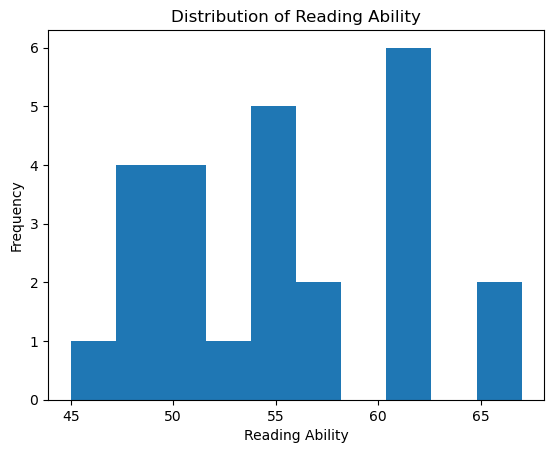

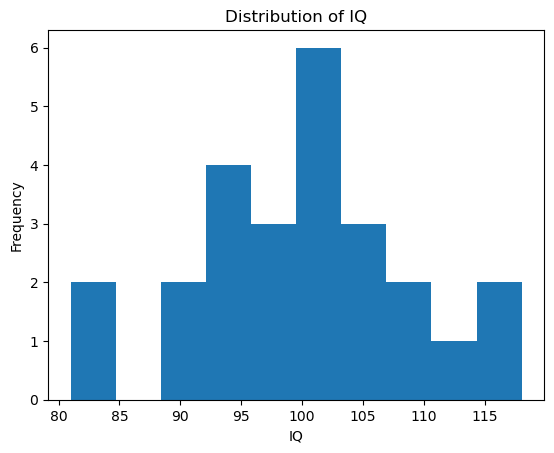

In [12]:
# Q1c (code):
# Check data distribution
# Check Distribution of Reading Ability
plt.hist(df_mh['Abil'])
plt.title('Distribution of Reading Ability')
plt.xlabel('Reading Ability')
plt.ylabel('Frequency')
plt.show()

#Check Distribution of IQ
plt.hist(df_mh['IQ'])
plt.title('Distribution of IQ')
plt.xlabel('IQ')
plt.ylabel('Frequency')
plt.show()



❗️Check whether the data is normally distributed in both variables.
- the distribution of reading ability does not belong to normally distrubution.
- the distribution of IQ belongs to normally distrubution, since its curve is symmetric around the mean and has a peak.


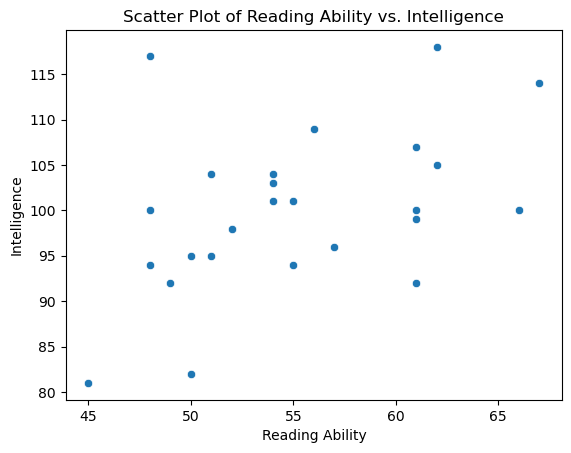

In [13]:
# Q1d (code):
# Scatter plot
plt.figure
sns.scatterplot(x='Abil', y='IQ', data=df_mh)
plt.title('Scatter Plot of Reading Ability vs. Intelligence')
plt.xlabel('Reading Ability')
plt.ylabel('Intelligence')
plt.show()


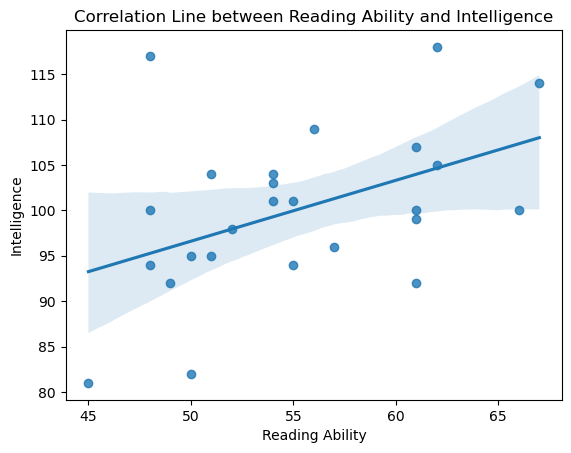

In [15]:
# Q1e (code):
# Correlation line
plt.figure
sns.regplot(x='Abil', y='IQ', data=df_mh, scatter=True)
plt.title('Correlation Line between Reading Ability and Intelligence')
plt.xlabel('Reading Ability')
plt.ylabel('Intelligence')
plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

#Q2a (answer with words):
Because both 'reading ability' and 'IQ' are continuous variables, we should use Pearson correlation coefficient for analysis.

In [16]:
# Q2b (code):
# Calculate pearson correlation coefficient
correlation_pearson = df_mh[['Abil', 'IQ']].corr(method='pearson').iloc[0, 1]

print("pearson correlation coefficient between Reading Ability and Intelligence:", correlation_pearson)


pearson correlation coefficient between Reading Ability and Intelligence: 0.4511699387650762


#Q2c (answer with words):
- Direction：The line slopes upwards, indicating a positive correlation, meaning that reading ability and IQ are positively proportional. 
- Association：most data points are clustered around the line, suggesting a strong fit of the line to the data.


## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [17]:
# Q3a (answer in words):
# H0:There is no association between reading ability and the amount of time spent reading at home per week.
# H1:There is association between reading ability and the amount of time spent reading at home per week.

In [18]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for performing the Chi-square test
from scipy.stats import chi2_contingency ##used for creating contingency matrix

# Define the rounded average for Reading Ability and Home
round_avg_abil = df_mh['Abil'].mean().round()
round_avg_home = df_mh['Home'].mean().round()

# Create the Rank_Abil column
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x: 'Low' if x <= round_avg_abil else 'High')

# Create the Rank_Home column
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'Infrequent' if x <= round_avg_home else 'Frequent')

df_mh

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,High,Frequent
1,2,56,109,123,608,High,Infrequent
2,3,45,81,108,640,Low,Infrequent
3,4,66,100,155,493,High,Frequent
4,5,49,92,103,636,Low,Infrequent
5,6,62,105,161,407,High,Frequent
6,7,61,92,138,463,High,Frequent
7,8,55,101,119,717,Low,Infrequent
8,9,62,118,155,643,High,Frequent
9,10,61,99,121,674,High,Infrequent


In [19]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])

contingency_matrix


Rank_Home,Frequent,Infrequent
Rank_Abil,,
High,8,2
Low,3,12


In [20]:
# Q3d (code):

# Perform the Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_matrix)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


Chi-square statistic: 6.500270562770561
p-value: 0.010785807794066234
Degrees of freedom: 1
Expected frequencies:
[[4.4 5.6]
 [6.6 8.4]]


#Q3e (answer in words):

Chi-square test results revealed a significant association between reading ability and the frequency of reading at home. Specifically, the obtained Chi-square statistic of 6.50, with 1 degree of freedom, along with a p-value of 0.0108, indicates a strong rejection of the null hypothesis. This suggests that individuals with different levels of reading ability tend to exhibit varying patterns of reading at home. 

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [21]:
import pandas as pd # Used for data manipulation and analysis
from scipy import stats # Used for scientific computing and statistical analysis
import numpy as np # Used for numerical computations
import matplotlib.pyplot as plt # Used for plotting
import seaborn as sns # Used for statistical visualization

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [22]:
# Q4a (code):
# Calculate mean and standard deviation for age

age_mean = df_evaluators['age'].mean()
age_std = df_evaluators['age'].std()

# Print mean and standard deviation
print("Mean age:", age_mean)
print("Standard deviation of age:", age_std)


Mean age: 30.852941176470587
Standard deviation of age: 6.238358141327351


In [23]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females

male_count = df_evaluators[df_evaluators['sex'] == 1]['sex'].count()
female_count = df_evaluators[df_evaluators['sex'] == 2]['sex'].count()

male_count, female_count



(4, 30)

###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [24]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [29]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
filtered_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

filtered_ratings 

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
5,2,competent,5.0
6,2,thoughtful,7.0
...,...,...,...
186,38,thoughtful,5.0
187,38,intelligent,5.0
190,39,competent,5.0
191,39,thoughtful,6.0


In [34]:
# Calculate the mean intellect rating for each evaluator
intellect_mean = filtered_ratings.groupby('eval_id')['Rating'].mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'

intellect_mean.head()

,eval_id,Rating,Category
0,1,6.000000,intellect
1,2,5.666667,intellect
2,3,6.000000,intellect
3,4,3.333333,intellect
4,5,1.000000,intellect


In [35]:
# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]
other_ratings 

,eval_id,Category,Rating
3,1,impression,7.000000
4,1,hire,6.000000
8,2,impression,4.666667
9,2,hire,4.000000
13,3,impression,8.333333
...,...,...,...
184,37,hire,7.000000
188,38,impression,8.333333
189,38,hire,5.000000
193,39,impression,5.666667


In [39]:
# Combine the DataFrames to create 'ratings2'
ratings2 = pd.concat([intellect_mean, other_ratings])

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id')

ratings2

,eval_id,Rating,Category,condition
0,1,6.000000,intellect,listened
1,1,7.000000,impression,listened
2,1,6.000000,hire,listened
3,2,5.666667,intellect,listened
4,2,4.666667,impression,listened
...,...,...,...,...
112,38,8.333333,impression,listened
113,38,5.000000,hire,listened
114,39,5.333333,intellect,listened
115,39,5.666667,impression,listened


In [40]:
# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2

,eval_id,Category,Rating,condition
2,1,hire,6.000000,listened
1,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
5,2,hire,4.000000,listened
4,2,impression,4.666667,listened
...,...,...,...,...
112,38,impression,8.333333,listened
111,38,intellect,5.000000,listened
116,39,hire,5.000000,listened
115,39,impression,5.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



#Q6a (answer in words):
- Null hypothesis H0:
There is no difference between ratings on listened and read 

- Alternative hypothesis H1:
There is difference between ratings on listened and read 

we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

#Q6b (answer in words):
Which t-test should we choose, one-tail or two-tail? Explian why.、

We should choose the two-tail t-test because we want to determine if there is a significant difference in  ratings between listened and read, without specifying the direction of the difference.

#Q6c (answer in words):
What are the independent variable and the dependent variable here?
The independent variable is the condition (listened and read), and the dependent variable is the rating given by evaluators.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [41]:
#Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for ...

# Descriptive analysis of the ratings
ratings_desc = ratings2.describe()
ratings_desc 

,eval_id,Rating
count,117.000000,117.000000
mean,20.000000,4.561254
std,11.303036,2.240198
min,1.000000,0.000000
25%,10.000000,3.000000
50%,20.000000,4.666667
75%,30.000000,6.000000
max,39.000000,9.000000


In [42]:
# present ratings2 dataframe
ratings2

,eval_id,Category,Rating,condition
2,1,hire,6.000000,listened
1,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
5,2,hire,4.000000,listened
4,2,impression,4.666667,listened
...,...,...,...,...
112,38,impression,8.333333,listened
111,38,intellect,5.000000,listened
116,39,hire,5.000000,listened
115,39,impression,5.666667,listened


Group the DataFrame 'ratings2' by the column 'condition', and then calculates the mean, minimum, and maximum values of the 'Rating' column for each group.

In [43]:
sub_df_ratings1=ratings2.groupby("condition").agg({'Rating' : ['mean', 'min', 'max']})
sub_df_ratings1

Rating               
               mean  min       max
condition                         
listened   5.439153  0.0  9.000000
read       3.537037  0.0  7.333333

Filter the DataFrame ratings2 to select only the rows where the value in the "condition" column is equal to "listened".

In [44]:
listened_loc = ratings2.loc[ratings2["condition"] == "listened"]
print(listened_loc)

     eval_id    Category    Rating condition
2          1        hire  6.000000  listened
1          1  impression  7.000000  listened
0          1   intellect  6.000000  listened
5          2        hire  4.000000  listened
4          2  impression  4.666667  listened
..       ...         ...       ...       ...
112       38  impression  8.333333  listened
111       38   intellect  5.000000  listened
116       39        hire  5.000000  listened
115       39  impression  5.666667  listened
114       39   intellect  5.333333  listened

[63 rows x 4 columns]


Select rows from the DataFrame ratings2 where the "condition" column has the value "read" and assigns the result to the variable read_loc

In [45]:
read_loc = ratings2.loc[ratings2["condition"] == "read"]
print(read_loc)

     eval_id    Category    Rating condition
11         4        hire  4.000000      read
10         4  impression  4.666667      read
9          4   intellect  3.333333      read
14         5        hire  1.000000      read
13         5  impression  1.333333      read
12         5   intellect  1.000000      read
17         6        hire  1.000000      read
16         6  impression  2.000000      read
15         6   intellect  2.000000      read
23         8        hire  2.000000      read
22         8  impression  1.666667      read
21         8   intellect  1.666667      read
29        10        hire  2.000000      read
28        10  impression  2.666667      read
27        10   intellect  3.666667      read
32        11        hire  4.000000      read
31        11  impression  7.333333      read
30        11   intellect  5.666667      read
41        14        hire  2.000000      read
40        14  impression  4.333333      read
39        14   intellect  3.666667      read
44        

Group the DataFrame ratings2 by the values in the "condition" column and creates a DataFrameGroupBy object named sub_df_iris3.

In [46]:
sub_df_iris3 = ratings2.groupby("condition")
print(sub_df_iris3)

Group the DataFrame ratings2 by the values in the "condition" column and then extracts the group corresponding to "listened". 

In [47]:
sub_df = ratings2.groupby("condition")
listened = sub_df.get_group("listened")
print(listened)

     eval_id    Category    Rating condition
2          1        hire  6.000000  listened
1          1  impression  7.000000  listened
0          1   intellect  6.000000  listened
5          2        hire  4.000000  listened
4          2  impression  4.666667  listened
..       ...         ...       ...       ...
112       38  impression  8.333333  listened
111       38   intellect  5.000000  listened
116       39        hire  5.000000  listened
115       39  impression  5.666667  listened
114       39   intellect  5.333333  listened

[63 rows x 4 columns]


Extracting the group corresponding to "read" from the DataFrame ratings2, which was previously grouped by the "condition" column.

In [48]:
read = sub_df.get_group("read")
read.head()

,eval_id,Category,Rating,condition
11,4,hire,4.000000,read
10,4,impression,4.666667,read
9,4,intellect,3.333333,read
14,5,hire,1.000000,read
13,5,impression,1.333333,read


In [49]:
#shapiro
#Calculate the Shapiro-Wilk test statistic and p-value for the ratings data of the "listened" condition. 
#The Shapiro-Wilk test is used to assess whether a sample comes from a normally distributed population.

score_shapiro_listened, p_val_shapiro_listened = stats.shapiro(listened['Rating'])
print(score_shapiro_listened, p_val_shapiro_listened)

0.9768293499946594 0.27983149886131287


In [50]:
score_shapiro_read, p_val_shapiro_read = stats.shapiro(read['Rating'])
print(score_shapiro_read, p_val_shapiro_read)

0.9513713121414185 0.02855449542403221


In [51]:
#levene
#The value of this statistic indicates how much the group variances differ from each other.
#p-value: This value determines whether the difference in variances is statistically significant.

score, p_val = stats.levene(listened['Rating'], read['Rating'])
print(score,p_val)
if p_val < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")

0.8244717008386527 0.3657748415618852
Levene's test is not significant - proceed


In [54]:
#t-test
#This statistic measures the difference between the means of the two groups relative to the variance within the groups.
#p-value: This value indicates the probability of observing the obtained t-test statistic (or more extreme) under the null hypothesis (H0) that there is no difference between the group means.

ttest_score, p_val = stats.ttest_ind(listened['Rating'], read['Rating'])
print(ttest_score,p_val)
if p_val < 0.05:
    print("Difference is statistically significant - reject H0, confirm H1")
else:
    print("Difference is NOT statistically significant - reject H1, confirm H0")

5.03648030818782 1.7751123233584968e-06
Difference is statistically significant - reject H0, confirm H1


In [53]:

# Split the data into two groups based on the condition
listened_data = ratings2[ratings2['condition'] == 'listened']
read_data = ratings2[ratings2['condition'] == 'read']

# Perform independent t-tests for intellect, impression, and hire ratings
t_stat_intellect, p_val_intellect = stats.ttest_ind(listened_data['Rating'][listened_data['Category'] == 'intellect'], 
                                                     read_data['Rating'][read_data['Category'] == 'intellect'])
t_stat_impression, p_val_impression = stats.ttest_ind(listened_data['Rating'][listened_data['Category'] == 'impression'], 
                                                      read_data['Rating'][read_data['Category'] == 'impression'])
t_stat_hire, p_val_hire = stats.ttest_ind(listened_data['Rating'][listened_data['Category'] == 'hire'], 
                                           read_data['Rating'][read_data['Category'] == 'hire'])

# Print the results
print("Intellect - t-statistic:", t_stat_intellect, "p-value:", p_val_intellect)
print("Impression - t-statistic:", t_stat_impression, "p-value:", p_val_impression)
print("Hire - t-statistic:", t_stat_hire, "p-value:", p_val_hire)

if p_val < 0.05:
    print("Difference is statistically significant - reject H0, confirm H1")
else:
    print("Difference is NOT statistically significant - reject H1, confirm H0")

Intellect - t-statistic: 3.5259329220482414 p-value: 0.0011444414996286821
Impression - t-statistic: 2.850766179025179 p-value: 0.007091060616710596
Hire - t-statistic: 2.620100218173143 p-value: 0.012674511839824125
Difference is NOT statistically significant - reject H1, confirm H0


#Q7b (answer in words):

The descriptive statistics provide information about the means, standard deviations, and sample sizes of the data. The Shapiro-Wilk test for normality is used to assess whether the data follow a normal distribution. In this example, the Shapiro-Wilk tests indicate that the ratings data for the "listened" group follow a normal distribution and "read" groups does not (p-values are 0.280 and 0.029, respectively). Levene's test is employed to examine whether the variances of the two groups are equal, and the result shows that the variances are not significantly different (p-value = 0.366), allowing us to proceed with an independent samples t-test.

The independent samples t-test is utilized to compare the means of two groups to determine if there is a significant difference. In this case, a significant difference in ratings between the "listened" and "read" groups is observed (t = 5.036, p < 0.001). Thus, we reject the null hypothesis that there is no difference between the two groups and accept the alternative hypothesis that there is a difference.

Additionally, another section of the code conducts independent samples t-tests for ratings under three different conditions ("intellect," "impression," and "hire"). The results indicate that there are statistically significant differences in ratings between the "listened" and "read" groups under each of these conditions (p-values are 0.001, 0.007, and 0.013, respectively). This suggests that the ratings for the "listened" and "read" groups differ across these three conditions.